In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [5]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score # metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px

In [6]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [8]:
df = pd.read_csv('AIML Dataset.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


DATA CLEANING

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [17]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [19]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
df.shape

(6362620, 11)

In [22]:
df_for_train = pd.get_dummies(df,columns=['type'],drop_first=True)

In [23]:
duplicated = df.duplicated().sum() #checking and deleting duplicated rows
duplicated

np.int64(0)

In [24]:
df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


EDA

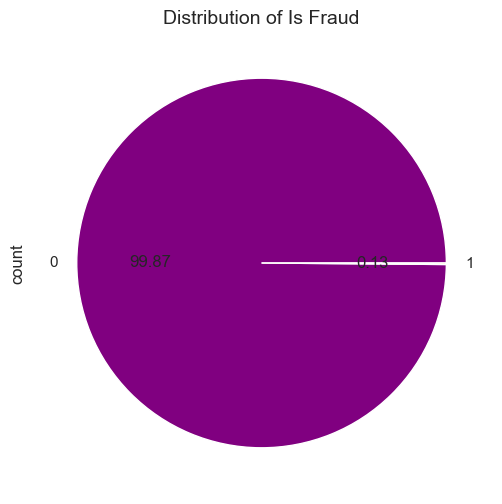

In [25]:
df['isFraud'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(12,6), colors=['purple', 'orange'])
plt.title('Distribution of Is Fraud', fontsize=14)
plt.show()

In [26]:
df_fraud = df[df['isFraud']==1]
summary = df_fraud.groupby('isFlaggedFraud').size().reset_index(name='count')
summary['isFlaggedFraud'] = summary['isFlaggedFraud'].map({
    0:'Not flagged',
    1:'Flagged'
})



In [27]:
source = summary

alt.Chart(source).mark_bar().encode(
    x='isFlaggedFraud:N',
    y='count:Q',
    color='isFlaggedFraud:N',
    tooltip=["isFlaggedFraud", "count"]
).properties(
   title="frauds flaggeds and not flagged",
    width=700,
    height=500
)


alt.Chart(...)

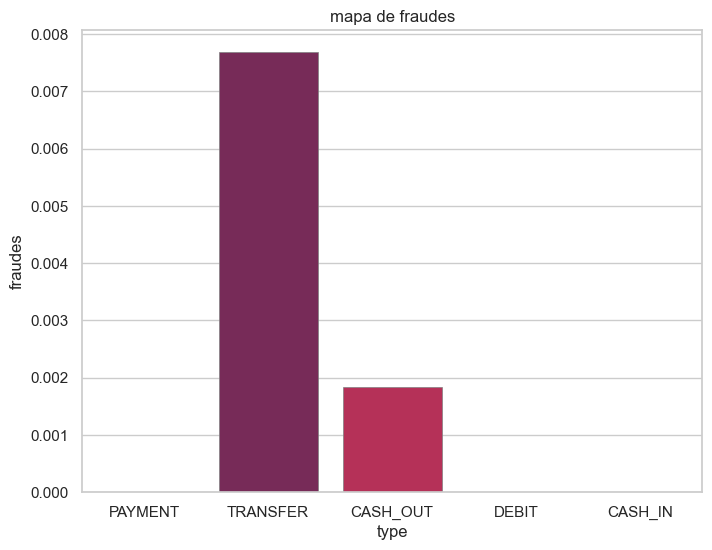

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x='type',
    y='isFraud',
    hue='type',
    errorbar=None,
    palette="rocket",
    linewidth=.5,
    edgecolor=".5"
)
plt.xlabel("type")  
plt.ylabel("fraudes")
plt.title("mapa de fraudes")
plt.legend().remove()  # Aquí se elimina la leyenda
plt.show()


In [29]:
transfer_fraud = df_fraud[df_fraud["type"]== "TRANSFER"]

top_accounts = (
    transfer_fraud.groupby("nameDest")["amount"]
    .sum()
    .nlargest(10)
    .index
)

transfer_fraud = transfer_fraud[transfer_fraud["nameDest"].isin(top_accounts)]

transfer_fraud = transfer_fraud.sort_values(by=["nameDest","step"])

accounts = transfer_fraud["nameDest"].unique()
charts = []

for account in accounts:
    account_data = transfer_fraud[transfer_fraud['nameDest'] == account]

    chart = alt.Chart(account_data).mark_line(point=True).encode(
        x=alt.X("step:O", title="Time or step"),
        y=alt.Y("amount:Q", title=f"Amount sent to account {account}"),
        tooltip=[
            alt.Tooltip("amount:Q"),
            alt.Tooltip("nameDest:N")
        ]
    ).properties(
        title=f"fraudulent account {account}, transactions recieved",
        width=400,
        height=300
    )
    charts.append(chart)
n_cols = 5
rows = [alt.hconcat(*charts[i:i + n_cols]) for i in range(0,len(charts),n_cols)]
mosaic = alt.vconcat(*rows)

mosaic


alt.VConcatChart(...)

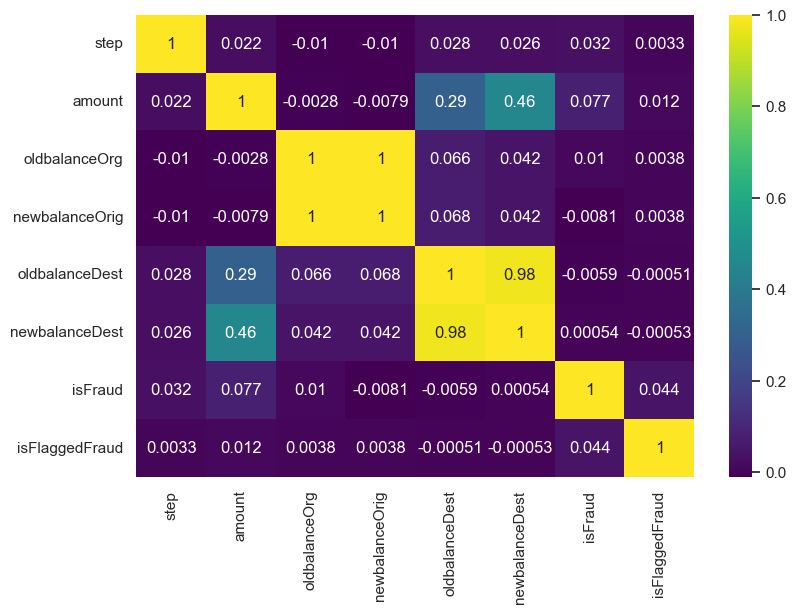

In [31]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis') 
plt.show()

LABEL ENCODING

In [32]:
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

In [33]:
df.drop(['nameOrig', 'nameDest', 'type'], axis=1, inplace=True)

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_res)}")

Original dataset shape: Counter({0: 6354407, 1: 8213})
Resampled dataset shape: Counter({0: 6354407, 1: 6354407})


Original training dataset shape: Counter({0.0: 5083526, 1.0: 6570})
Resampled training dataset shape: Counter({0.0: 5083526, 1.0: 508352})

Training the Stacking Classifier...
Model training complete.

Evaluation Metrics for Stacking Classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1270881
         1.0       0.72      0.92      0.81      1643

    accuracy                           1.00   1272524
   macro avg       0.86      0.96      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy: 0.9994
Precision: 0.7177
Recall: 0.9239
F1 Score: 0.8079


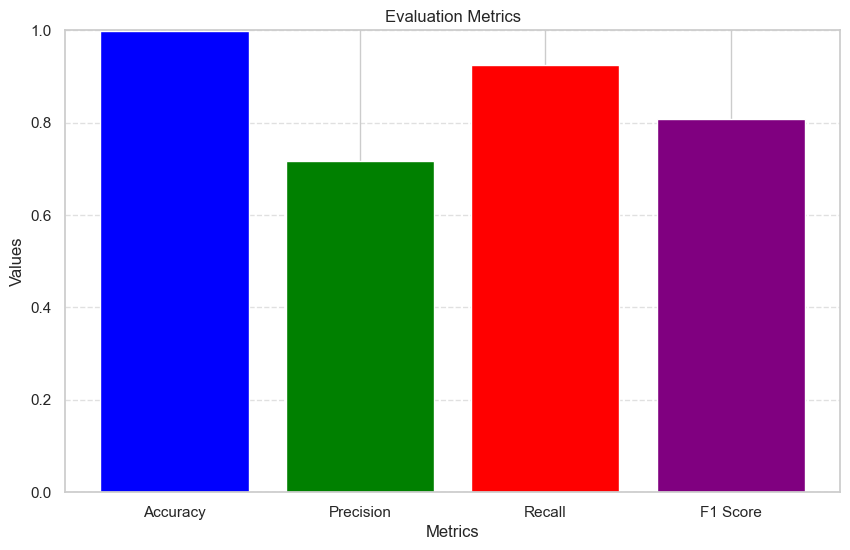

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

# --- 1. Data Loading and Initial Preprocessing ---
df = pd.read_csv('AIML Dataset.csv')

# Drop duplicated rows
df.drop_duplicates(inplace=True)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Use SimpleImputer to fill missing values only in numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Use LabelEncoder to encode the 'type' column
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)
    categorical_cols.remove('type')
    
# Drop other non-useful categorical columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# --- 2. Separate Features and Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Set a random seed for reproducibility
random_state = 42

# --- 3. Stratify the data split and scale features ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Apply SMOTE to the training data only with a smaller sampling strategy ---
print(f"Original training dataset shape: {Counter(y_train)}")
# Set a smaller sampling strategy to reduce memory usage.
# Here, we set the minority class size to 10% of the majority class size.
smote = SMOTE(sampling_strategy=0.1, random_state=random_state) 
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print(f"Resampled training dataset shape: {Counter(y_train_res)}")

# --- 5. Train the Stacking Classifier on the resampled data ---
print("\nTraining the Stacking Classifier...")
base_models = [
    # Reduced n_estimators from 100 to 50
    ('rf', RandomForestClassifier(n_estimators=50, random_state=random_state)),
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced'))
]
# Reduced n_estimators from 100 to 50
meta_model = RandomForestClassifier(n_estimators=50, random_state=random_state)
# Limited n_jobs to 4 to prevent memory overflow
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=4)
stacking_model.fit(X_train_res, y_train_res)
print("Model training complete.")

# --- 6. Model Evaluation on the original (un-resampled) test data ---
y_pred = stacking_model.predict(X_test_scaled)

print("\nEvaluation Metrics for Stacking Classifier:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 7. Plotting the bar graph ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- 8. Add predicted column to the original data ---
X_full = df.drop('isFraud', axis=1)
X_full_scaled = scaler.transform(X_full)
df['Predicted_Fraud'] = stacking_model.predict(X_full_scaled)
df.to_csv("predicted_fraud_dataset.csv", index=False)

In [47]:
# Add this at the very end of your script to save the model and scaler
import joblib

# Save the trained model to a file
joblib.dump(stacking_model, 'stacking_model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully! You can now use them in your web app.")

Model and scaler saved successfully! You can now use them in your web app.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from collections import Counter
import joblib

# --- 1. Data Loading and Initial Preprocessing ---
df = pd.read_csv('AIML Dataset.csv')

# Optional: Reduce dataset size to prevent MemoryError
df = df.sample(n=500000, random_state=42)   # keep 500k rows only

# Drop duplicated rows and unused columns
df.drop_duplicates(inplace=True)
df.drop(['isFlaggedFraud', 'step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Downcast numerical columns to save memory
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], downcast='float')

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode categorical column 'type'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)

# --- 2. Separate Features and Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Set random seed
random_state = 42

# --- 3. Train-Test Split & Scaling ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training dataset shape: {Counter(y_train)}")

# --- 4. Stacking Classifier ---
print("\nTraining the Stacking Classifier...")
base_models = [
    ('rf', RandomForestClassifier(
        n_estimators=30, random_state=random_state, class_weight='balanced'
    )),
    ('lr', LogisticRegression(
        random_state=random_state, class_weight='balanced', max_iter=200
    ))
]

meta_model = LogisticRegression(
    random_state=random_state, class_weight='balanced', max_iter=200
)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,          # reduced from 5 to 3
    n_jobs=1       # disable parallelism to save RAM
)

stacking_model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 5. Model Evaluation ---
y_pred = stacking_model.predict(X_test_scaled)

print("\nEvaluation Metrics for Stacking Classifier:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 6. Save Model & Scaler ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully! You can now use them in your web app.")


Training dataset shape: Counter({0.0: 399482, 1.0: 518})

Training the Stacking Classifier...
Model training complete.

Evaluation Metrics for Stacking Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     99871
         1.0       0.05      0.88      0.10       129

    accuracy                           0.98    100000
   macro avg       0.53      0.93      0.54    100000
weighted avg       1.00      0.98      0.99    100000

Accuracy: 0.9796
Precision: 0.0530
Recall: 0.8760
F1 Score: 0.0999
✅ Model and scaler saved successfully! You can now use them in your web app.


Original training dataset shape: Counter({0.0: 5083526, 1.0: 6570})
Resampled training dataset shape: Counter({0.0: 32850, 1.0: 16425})

Training the Stacking Classifier...
Model training complete.

Evaluation Metrics for Stacking Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   1270881
         1.0       0.19      0.99      0.31      1643

    accuracy                           0.99   1272524
   macro avg       0.59      0.99      0.66   1272524
weighted avg       1.00      0.99      1.00   1272524

Accuracy: 0.9944
Precision: 0.1872
Recall: 0.9884
F1 Score: 0.3148


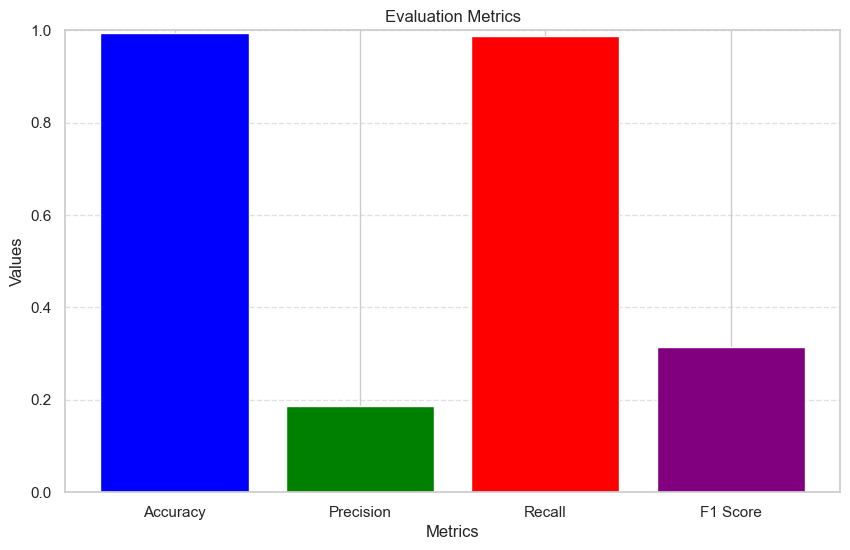

✅ Model and scaler saved successfully! You can now use them in your Streamlit app.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import joblib

# --- 1. Data Loading ---
df = pd.read_csv('AIML Dataset.csv')
df.drop_duplicates(inplace=True)

# --- 2. Handle Missing Values ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode 'type' column
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)
    categorical_cols.remove('type')

# Drop unused categorical columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# --- 3. Downcast numerical columns ---
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], downcast='float')

# --- 4. Features & Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

random_state = 42

# --- 5. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Balance Data (Undersample + SMOTE) ---
print(f"Original training dataset shape: {Counter(y_train)}")

rus = RandomUnderSampler(sampling_strategy=0.2, random_state=random_state)
X_train_small, y_train_small = rus.fit_resample(X_train_scaled, y_train)

smote = SMOTE(sampling_strategy=0.5, random_state=random_state)
X_train_res, y_train_res = smote.fit_resample(X_train_small, y_train_small)

print(f"Resampled training dataset shape: {Counter(y_train_res)}")

# --- 7. Train Stacking Classifier (Logistic + Random Forest) ---
print("\nTraining the Stacking Classifier...")

base_models = [
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced', max_iter=500)),
    ('rf', RandomForestClassifier(random_state=random_state, n_estimators=100, n_jobs=2))
]
meta_model = LogisticRegression(random_state=random_state, max_iter=500)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    n_jobs=2
)

stacking_model.fit(X_train_res, y_train_res)
print("Model training complete.")

# --- 8. Evaluation ---
y_pred = stacking_model.predict(X_test_scaled)

print("\nEvaluation Metrics for Stacking Classifier:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 9. Plotting metrics ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- 10. Save Model and Scaler ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully! You can now use them in your Streamlit app.")


In [ ]:
pip install xgboost


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from collections import Counter
import joblib

# --- 1. Data Loading and Initial Preprocessing ---
# Read only 100,000 rows to avoid MemoryError
df = pd.read_csv('AIML Dataset.csv', nrows=100000)

# Drop duplicated rows and columns not used in the app's input
df.drop_duplicates(inplace=True)
df.drop(['isFlaggedFraud', 'step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Use SimpleImputer to fill missing values only in numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Use LabelEncoder to encode the 'type' column
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)
    categorical_cols.remove('type')
    
# --- 2. Separate Features and Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Set a random seed for reproducibility
random_state = 42

# --- 3. Stratify the data split and scale features ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. No SMOTE to avoid MemoryError. Use class_weight instead.
print(f"Training dataset shape: {Counter(y_train)}")

# --- 5. Train the Stacking Classifier on the original, scaled training data ---
print("\nTraining the Stacking Classifier...")
base_models = [
    # Use class_weight='balanced' to handle the data imbalance without oversampling
    ('rf', RandomForestClassifier(n_estimators=50, random_state=random_state, class_weight='balanced')),
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced'))
]
meta_model = RandomForestClassifier(n_estimators=50, random_state=random_state)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=4)
stacking_model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 6. Model Evaluation on the original (un-resampled) test data ---
y_pred = stacking_model.predict(X_test_scaled)

print("\nEvaluation Metrics for Stacking Classifier:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 7. Save the trained model and scaler ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully! You can now use them in your web app.")


Training dataset shape: Counter({0.0: 79907, 1.0: 93})

Training the Stacking Classifier...
Model training complete.

Evaluation Metrics for Stacking Classifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.56      0.61      0.58        23

    accuracy                           1.00     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9990
Precision: 0.5600
Recall: 0.6087
F1 Score: 0.5833
Model and scaler saved successfully! You can now use them in your web app.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from collections import Counter
import joblib

# --- 1. Data Loading and Initial Preprocessing ---
# Read only 100,000 rows to avoid MemoryError
df = pd.read_csv('AIML Dataset.csv', nrows=100000)

# Drop duplicated rows and columns not used in the app's input
df.drop_duplicates(inplace=True)
df.drop(['isFlaggedFraud', 'step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Use SimpleImputer to fill missing values only in numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Use LabelEncoder to encode the 'type' column
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)
    categorical_cols.remove('type')
    
# --- 2. Separate Features and Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Set a random seed for reproducibility
random_state = 42

# --- 3. Stratify the data split and scale features ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. No SMOTE to avoid MemoryError. Use class_weight instead.
print(f"Training dataset shape: {Counter(y_train)}")

# --- 5. Train the Stacking Classifier on the original, scaled training data ---
print("\nTraining the Stacking Classifier...")
base_models = [
    # Use class_weight='balanced' to handle the data imbalance without oversampling
    ('rf', RandomForestClassifier(n_estimators=50, random_state=random_state, class_weight='balanced')),
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced'))
]
meta_model = RandomForestClassifier(n_estimators=50, random_state=random_state)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=4)
stacking_model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 6. Model Evaluation ---

# Original evaluation with default threshold (0.5)
y_pred = stacking_model.predict(X_test_scaled)
print("\n--- Evaluation with Default Threshold (0.5) ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=1):.4f}")

# Re-evaluate with a higher threshold (e.g., 0.7) to improve precision
y_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]
new_threshold = 0.7
y_pred_high_threshold = (y_pred_proba > new_threshold).astype(int)

print(f"\n--- Evaluation with Higher Threshold ({new_threshold}) ---")
print(classification_report(y_test, y_pred_high_threshold))
print(f"Accuracy: {accuracy_score(y_test, y_pred_high_threshold):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")

# --- 7. Save the trained model and scaler ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nModel and scaler saved successfully! You can now use them in your web app.")


Training dataset shape: Counter({0.0: 79907, 1.0: 93})

Training the Stacking Classifier...
Model training complete.

--- Evaluation with Default Threshold (0.5) ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.56      0.61      0.58        23

    accuracy                           1.00     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9990
Precision: 0.5600
Recall: 0.6087
F1 Score: 0.5833

--- Evaluation with Higher Threshold (0.7) ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.83      0.43      0.57        23

    accuracy                           1.00     20000
   macro avg       0.92      0.72      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9992
Precision: 0.8333
Recall: 0.4348
F1 Score: 0.571

Training dataset shape: Counter({0.0: 79907, 1.0: 93})

Training the Stacking Classifier...
Model training complete.

--- Evaluation with Default Threshold (0.5) ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.56      0.61      0.58        23

    accuracy                           1.00     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9990
Precision: 0.5600
Recall: 0.6087
F1 Score: 0.5833

--- Evaluation with Higher Threshold (0.7) ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.83      0.43      0.57        23

    accuracy                           1.00     20000
   macro avg       0.92      0.72      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9992
Precision: 0.8333
Recall: 0.4348
F1 Score: 0.571

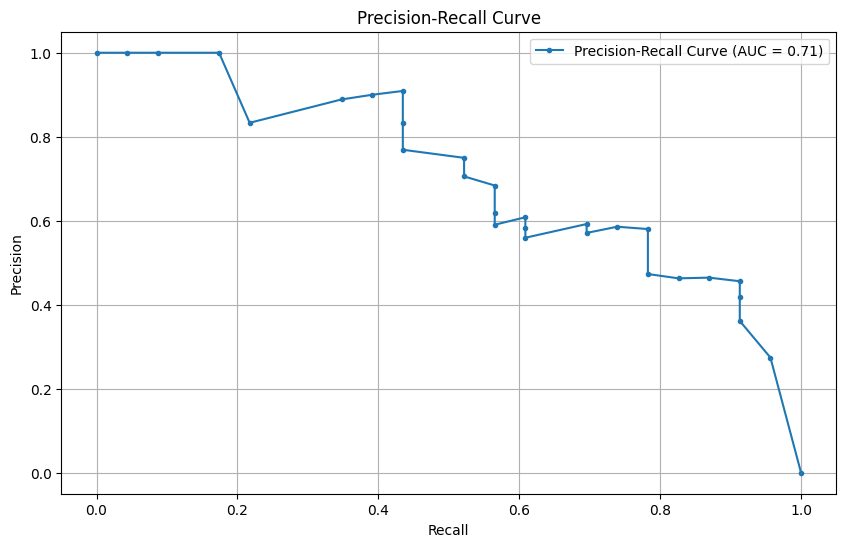


Model and scaler saved successfully! You can now use them in your web app.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from collections import Counter
import joblib

# --- 1. Data Loading and Initial Preprocessing ---
# Read only 100,000 rows to avoid MemoryError
df = pd.read_csv('AIML Dataset.csv', nrows=100000)

# Drop duplicated rows and columns not used in the app's input
df.drop_duplicates(inplace=True)
df.drop(['isFlaggedFraud', 'step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Use SimpleImputer to fill missing values only in numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Use LabelEncoder to encode the 'type' column
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)
    categorical_cols.remove('type')
    
# --- 2. Separate Features and Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Set a random seed for reproducibility
random_state = 42

# --- 3. Stratify the data split and scale features ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. No SMOTE to avoid MemoryError. Use class_weight instead.
print(f"Training dataset shape: {Counter(y_train)}")

# --- 5. Train the Stacking Classifier on the original, scaled training data ---
print("\nTraining the Stacking Classifier...")
base_models = [
    # Use class_weight='balanced' to handle the data imbalance without oversampling
    ('rf', RandomForestClassifier(n_estimators=50, random_state=random_state, class_weight='balanced')),
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced'))
]
meta_model = RandomForestClassifier(n_estimators=50, random_state=random_state)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=4)
stacking_model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 6. Model Evaluation ---

# Original evaluation with default threshold (0.5)
y_pred = stacking_model.predict(X_test_scaled)
print("\n--- Evaluation with Default Threshold (0.5) ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=1):.4f}")

# Re-evaluate with a higher threshold (e.g., 0.7) to improve precision
y_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]
new_threshold = 0.7
y_pred_high_threshold = (y_pred_proba > new_threshold).astype(int)

print(f"\n--- Evaluation with Higher Threshold ({new_threshold}) ---")
print(classification_report(y_test, y_pred_high_threshold))
print(f"Accuracy: {accuracy_score(y_test, y_pred_high_threshold):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")

# --- 7. Plot Precision-Recall Curve ---
print("\nGenerating Precision-Recall Curve...")
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# --- 8. Save the trained model and scaler ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nModel and scaler saved successfully! You can now use them in your web app.")


Training dataset shape: Counter({0.0: 79907, 1.0: 93})

Training the Stacking Classifier...
Model training complete.

--- Evaluation with Default Threshold (0.5) ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.56      0.61      0.58        23

    accuracy                           1.00     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9990
Precision: 0.5600
Recall: 0.6087
F1 Score: 0.5833

--- Evaluation with Higher Threshold (0.7) ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.83      0.43      0.57        23

    accuracy                           1.00     20000
   macro avg       0.92      0.72      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9992
Precision: 0.8333
Recall: 0.4348
F1 Score: 0.571

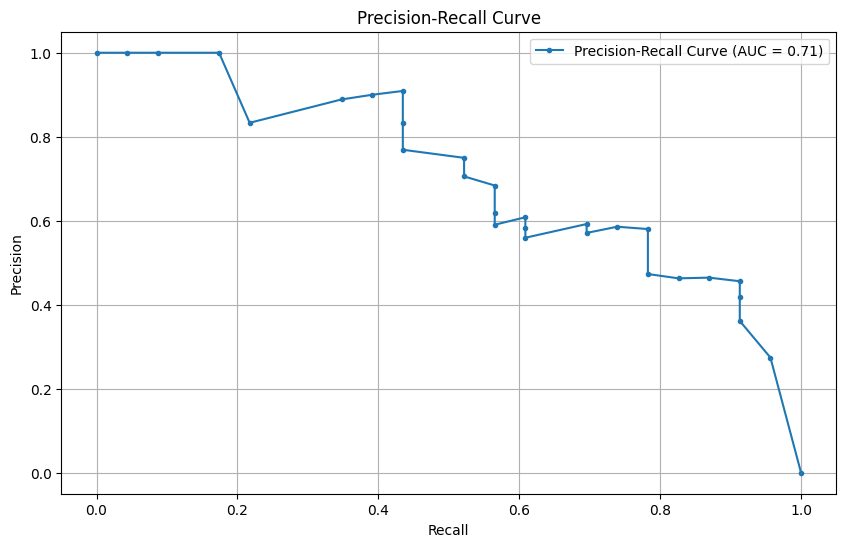


Model, scaler, and feature order saved successfully! You can now use them in your web app.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from collections import Counter
import joblib

# --- 1. Data Loading and Initial Preprocessing ---
df = pd.read_csv('AIML Dataset.csv', nrows=100000)
df.drop_duplicates(inplace=True)
df.drop(['isFlaggedFraud', 'step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Fill missing numerical values
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode 'type' column
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)
    categorical_cols.remove('type')
    
# --- 2. Separate Features and Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Set a random seed for reproducibility
random_state = 42

# --- 3. Stratify the data split and scale features ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. No SMOTE to avoid MemoryError. Use class_weight instead.
print(f"Training dataset shape: {Counter(y_train)}")

# --- 5. Train the Stacking Classifier on the original, scaled training data ---
print("\nTraining the Stacking Classifier...")
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=random_state, class_weight='balanced')),
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced'))
]
meta_model = RandomForestClassifier(n_estimators=50, random_state=random_state)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=4)
stacking_model.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 6. Model Evaluation ---
y_pred = stacking_model.predict(X_test_scaled)
print("\n--- Evaluation with Default Threshold (0.5) ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=1):.4f}")

y_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]
new_threshold = 0.7
y_pred_high_threshold = (y_pred_proba > new_threshold).astype(int)

print(f"\n--- Evaluation with Higher Threshold ({new_threshold}) ---")
print(classification_report(y_test, y_pred_high_threshold))
print(f"Accuracy: {accuracy_score(y_test, y_pred_high_threshold):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_high_threshold, zero_division=1):.4f}")

# Plot Precision-Recall Curve
print("\nGenerating Precision-Recall Curve...")
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# --- 7. Save the trained model, scaler, AND feature order ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_order.pkl')

print("\nModel, scaler, and feature order saved successfully! You can now use them in your web app.")


Training dataset shape: Counter({0: 79907, 1: 93})

Training the Stacking Classifier...
Model training complete.

Evaluation Metrics for Stacking Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19977
           1       0.59      0.57      0.58        23

    accuracy                           1.00     20000
   macro avg       0.80      0.78      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Accuracy: 0.9990
Precision: 0.5909
Recall: 0.5652
F1 Score: 0.5778

--- Evaluation with Default Threshold (0.5) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19977
           1       0.59      0.57      0.58        23

    accuracy                           1.00     20000
   macro avg       0.80      0.78      0.79     20000
weighted avg       1.00      1.00      1.00     20000


--- Evaluation with Higher Threshold (0.7) ---
              precision 

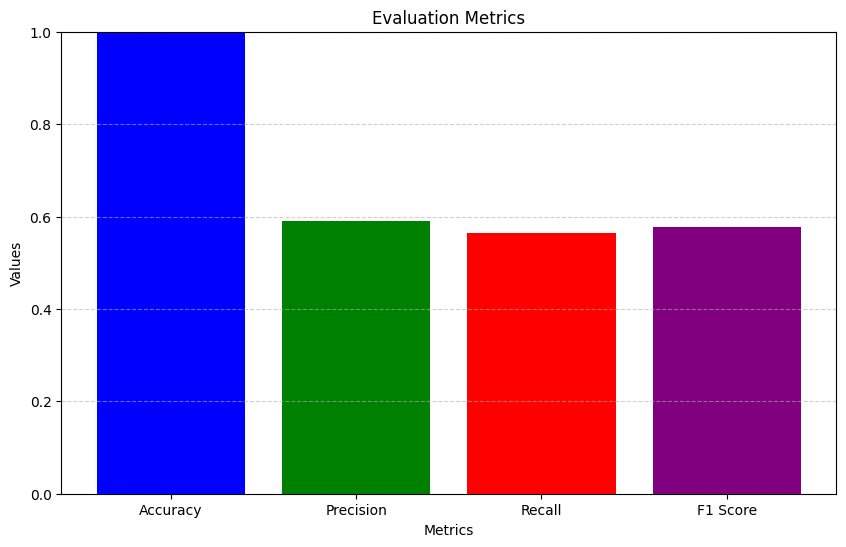


Generating Precision-Recall Curve...


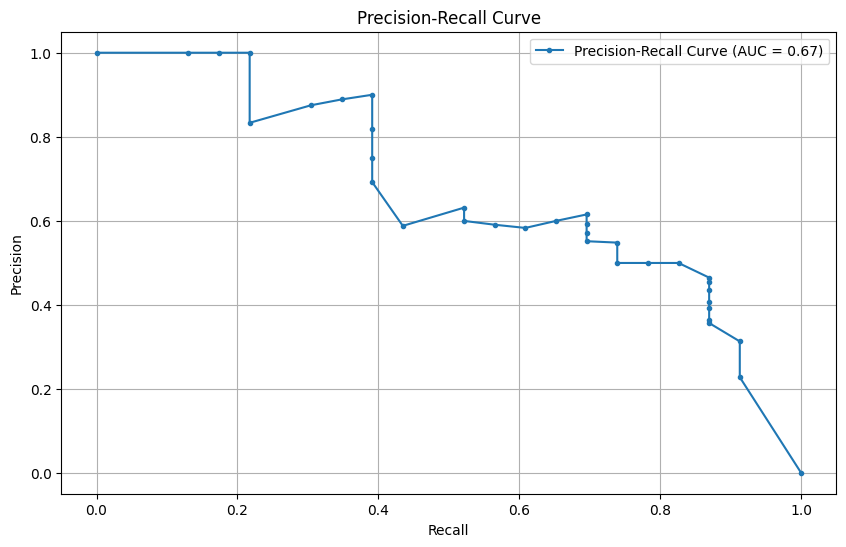


Model, scaler, and feature order saved successfully! You can now use them in your web app.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from collections import Counter
import joblib

# --- 1. Data Loading and Initial Preprocessing ---
df = pd.read_csv('AIML Dataset.csv', nrows=100000)
df.drop_duplicates(inplace=True)
df.drop(['isFlaggedFraud', 'step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Identify categorical and numerical columns for preprocessing
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# --- 2. Preprocessing with ColumnTransformer ---
# Impute numerical data and one-hot encode categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
all_feature_names = numerical_cols + feature_names

# Convert back to DataFrame to preserve column names
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# --- 3. Stratify the data split and scale features ---
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=random_state, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training dataset shape: {Counter(y_train)}")

# --- 4. Train the Stacking Classifier ---
print("\nTraining the Stacking Classifier...")
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=random_state, class_weight='balanced')),
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced'))
]
meta_model = RandomForestClassifier(n_estimators=50, random_state=random_state)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=4)
stacking_model.fit(X_train_scaled, y_train)
print("Model training complete.")

y_pred = stacking_model.predict(X_test_scaled)

print("\nEvaluation Metrics for Stacking Classifier:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 5. Model Evaluation ---
y_pred = stacking_model.predict(X_test_scaled)
print("\n--- Evaluation with Default Threshold (0.5) ---")
print(classification_report(y_test, y_pred))

y_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]
new_threshold = 0.7
y_pred_high_threshold = (y_pred_proba > new_threshold).astype(int)

print(f"\n--- Evaluation with Higher Threshold ({new_threshold}) ---")
print(classification_report(y_test, y_pred_high_threshold))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# --- 6. Plot Precision-Recall Curve ---
print("\nGenerating Precision-Recall Curve...")
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# --- 7. Save the trained model, scaler, and feature order ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(all_feature_names, 'feature_order.pkl')

print("\nModel, scaler, and feature order saved successfully! You can now use them in your web app.")


Original training dataset shape: Counter({0: 7946, 1: 54})
Resampled training dataset shape: Counter({0: 7946, 1: 794})

Training the Stacking Classifier...
Model training complete.


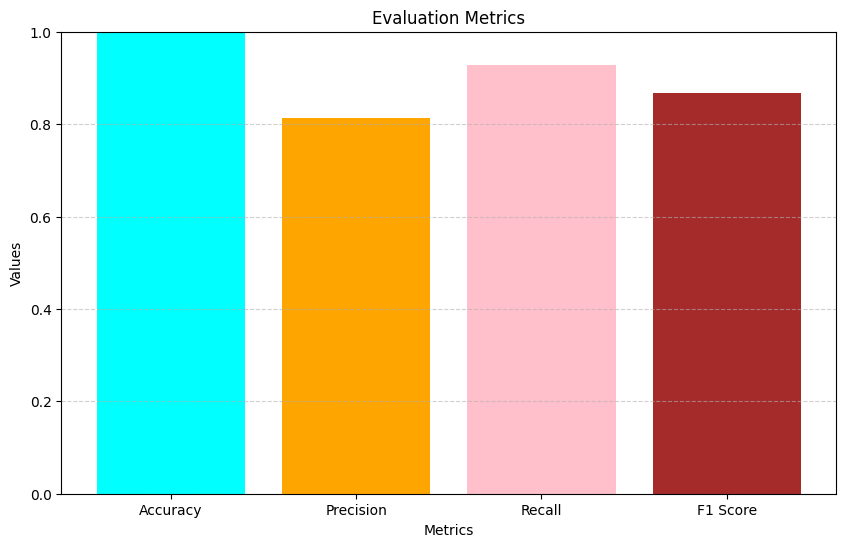


--- Evaluation Metrics---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1986
           1       0.68      0.93      0.79        14

    accuracy                           1.00      2000
   macro avg       0.84      0.96      0.89      2000
weighted avg       1.00      1.00      1.00      2000


--- Evaluation with Higher Threshold (0.7) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1986
           1       0.81      0.93      0.87        14

    accuracy                           1.00      2000
   macro avg       0.91      0.96      0.93      2000
weighted avg       1.00      1.00      1.00      2000



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

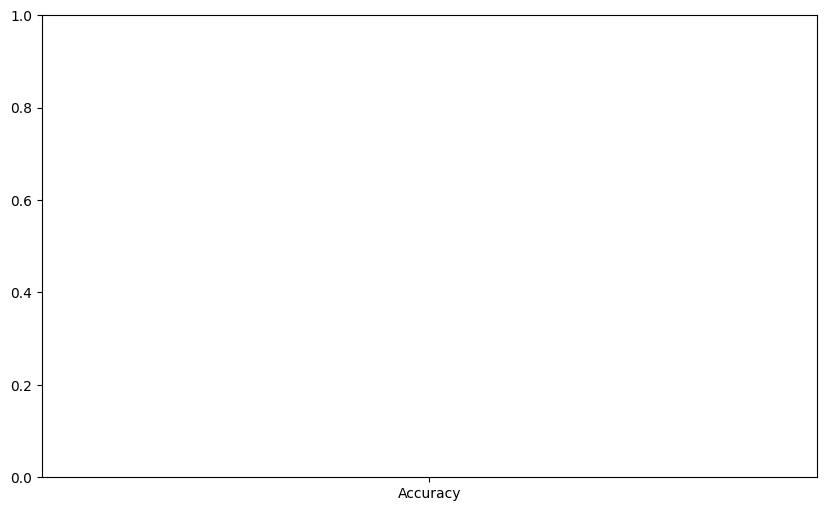

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib

# --- 1. Data Loading and Initial Preprocessing ---
# Read only a small subset of the data to avoid MemoryError during SMOTE
df = pd.read_csv('AIML Dataset.csv', nrows=10000)

# Drop unused columns and duplicates
df.drop_duplicates(inplace=True)
df.drop(['isFlaggedFraud', 'step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Identify categorical and numerical columns for preprocessing
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# --- 2. Preprocessing with ColumnTransformer ---
# Impute numerical data and one-hot encode categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessor to the data
X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
all_feature_names = numerical_cols + feature_names

# Convert back to DataFrame to preserve column names
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# --- 3. Stratified Train-Test Split ---
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=random_state, stratify=y)

# --- 4. Resample the training data using SMOTE ---
print(f"Original training dataset shape: {Counter(y_train)}")
smote = SMOTE(sampling_strategy=0.1, random_state=random_state)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"Resampled training dataset shape: {Counter(y_train_res)}")

# --- 5. Scale the resampled features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# --- 6. Train the Stacking Classifier on the resampled data ---
print("\nTraining the Stacking Classifier...")
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=random_state, class_weight='balanced')),
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced'))
]
meta_model = RandomForestClassifier(n_estimators=50, random_state=random_state)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=4)
stacking_model.fit(X_train_scaled, y_train_res)
print("Model training complete.")

# --- 7. Model Evaluation ---
# --- 7b. Bar Graph for Higher Threshold (0.7) Evaluation ---
accuracy_high = accuracy_score(y_test, y_pred_high_threshold)
precision_high = precision_score(y_test, y_pred_high_threshold, zero_division=1)
recall_high = recall_score(y_test, y_pred_high_threshold, zero_division=1)
f1_high = f1_score(y_test, y_pred_high_threshold, zero_division=1)

metrics_high = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_high = [accuracy_high, precision_high, recall_high, f1_high]

plt.figure(figsize=(10, 6))
plt.bar(metrics_high, values_high, color=['cyan', 'orange', 'pink', 'brown'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title(f'Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# --- 5. Model Evaluation ---
y_pred = stacking_model.predict(X_test_scaled)
print("\n--- Evaluation Metrics---")
print(classification_report(y_test, y_pred))

y_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]
new_threshold = 0.7
y_pred_high_threshold = (y_pred_proba > new_threshold).astype(int)

print(f"\n--- Evaluation with Higher Threshold ({new_threshold}) ---")
print(classification_report(y_test, y_pred_high_threshold))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# --- 8. Plot Precision-Recall Curve ---
print("\nGenerating Precision-Recall Curve...")
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# --- 9. Save the trained model, scaler, and feature order ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(all_feature_names, 'feature_order.pkl')

print("\nModel, scaler, and feature order saved successfully! You can now use them in your web app.")


Original training dataset shape: Counter({0.0: 5083526, 1.0: 6570})
Resampled training dataset shape: Counter({0.0: 32850, 1.0: 16425})

Training the Stacking Classifier...
Model training complete.

Evaluation Metrics for Stacking Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   1270881
         1.0       0.19      0.99      0.31      1643

    accuracy                           0.99   1272524
   macro avg       0.59      0.99      0.66   1272524
weighted avg       1.00      0.99      1.00   1272524

Accuracy: 0.9944
Precision: 0.1872
Recall: 0.9884
F1 Score: 0.3148


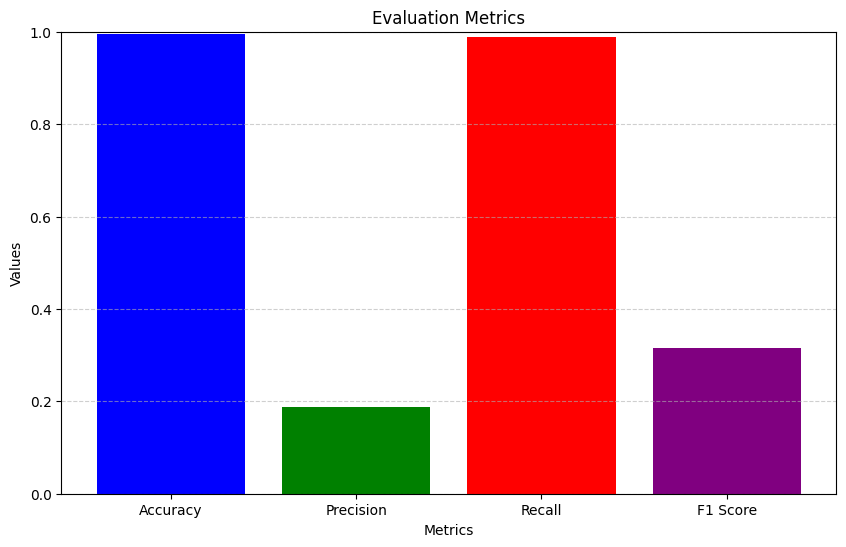

✅ Model and scaler saved successfully! You can now use them in your Streamlit app.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import joblib

# --- 1. Data Loading ---
df = pd.read_csv('AIML Dataset.csv')
df.drop_duplicates(inplace=True)

# --- 2. Handle Missing Values ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode 'type' column
if 'type' in categorical_cols:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])
    df.drop('type', axis=1, inplace=True)
    categorical_cols.remove('type')

# Drop unused categorical columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# --- 3. Downcast numerical columns ---
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], downcast='float')

# --- 4. Features & Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

random_state = 42

# --- 5. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Balance Data (Undersample + SMOTE) ---
print(f"Original training dataset shape: {Counter(y_train)}")

rus = RandomUnderSampler(sampling_strategy=0.2, random_state=random_state)
X_train_small, y_train_small = rus.fit_resample(X_train_scaled, y_train)

smote = SMOTE(sampling_strategy=0.5, random_state=random_state)
X_train_res, y_train_res = smote.fit_resample(X_train_small, y_train_small)

print(f"Resampled training dataset shape: {Counter(y_train_res)}")

# --- 7. Train Stacking Classifier (Logistic + Random Forest) ---
print("\nTraining the Stacking Classifier...")

base_models = [
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced', max_iter=500)),
    ('rf', RandomForestClassifier(random_state=random_state, n_estimators=100, n_jobs=2))
]
meta_model = LogisticRegression(random_state=random_state, max_iter=500)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    n_jobs=2
)

stacking_model.fit(X_train_res, y_train_res)
print("Model training complete.")

# --- 8. Evaluation ---
y_pred = stacking_model.predict(X_test_scaled)

print("\nEvaluation Metrics for Stacking Classifier:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 9. Plotting metrics ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- 10. Save Model and Scaler ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully! You can now use them in your Streamlit app.")


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import joblib

# --- 1. Load Dataset ---
df = pd.read_csv('AIML Dataset.csv')
df.drop_duplicates(inplace=True)

# --- 2. Handle Missing Values ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# --- 3. One-Hot Encode 'type' column ---
if 'type' in categorical_cols:
    df = pd.get_dummies(df, columns=['type'], drop_first=False)  # one-hot encoding
    categorical_cols.remove('type')

# Drop unused string columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True, errors='ignore')

# --- 4. Downcast numerical columns ---
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], downcast='float')

# --- 5. Features & Target ---
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Save feature order
feature_order = X.columns.tolist()
joblib.dump(feature_order, 'feature_order.pkl')

random_state = 42

# --- 6. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 7. Balance Data ---
print(f"Original training dataset shape: {Counter(y_train)}")

rus = RandomUnderSampler(sampling_strategy=0.2, random_state=random_state)
X_train_small, y_train_small = rus.fit_resample(X_train_scaled, y_train)

smote = SMOTE(sampling_strategy=0.5, random_state=random_state)
X_train_res, y_train_res = smote.fit_resample(X_train_small, y_train_small)

print(f"Resampled training dataset shape: {Counter(y_train_res)}")

# --- 8. Train Model ---
print("\nTraining the Stacking Classifier...")

base_models = [
    ('lr', LogisticRegression(random_state=random_state, class_weight='balanced', max_iter=500)),
    ('rf', RandomForestClassifier(random_state=random_state, n_estimators=100, n_jobs=2))
]
meta_model = LogisticRegression(random_state=random_state, max_iter=500)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    n_jobs=2
)

stacking_model.fit(X_train_res, y_train_res)
print("✅ Model training complete.")

# --- 9. Evaluation ---
y_pred = stacking_model.predict(X_test_scaled)

print("\nEvaluation Metrics for Stacking Classifier:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 10. Save Model and Scaler ---
joblib.dump(stacking_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model, scaler, and feature order saved successfully!")


Original training dataset shape: Counter({0.0: 5083526, 1.0: 6570})
Resampled training dataset shape: Counter({0.0: 32850, 1.0: 16425})

Training the Stacking Classifier...
✅ Model training complete.

Evaluation Metrics for Stacking Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   1270881
         1.0       0.18      0.99      0.30      1643

    accuracy                           0.99   1272524
   macro avg       0.59      0.99      0.65   1272524
weighted avg       1.00      0.99      1.00   1272524

Accuracy: 0.9942
Precision: 0.1796
Recall: 0.9878
F1 Score: 0.3040
✅ Model, scaler, and feature order saved successfully!
